In [1]:
!pip install -U peft bitsandbytes transformers accelerate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 11.0 MB/s eta 0:00:00


In [2]:
!pip install -U trl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.4/517.4 kB 11.0 MB/s eta 0:00:00


In [3]:
!pip install PyMuPDF


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 102.7 MB/s eta 0:00:00


In [4]:
from datasets import Dataset, load_dataset


In [5]:
dataset = load_dataset("roneneldan/TinyStories", split="train")


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00004-2d5a1467fff108(…):   0%|          | 0.00/249M [00:00<?, ?B/s]

data/train-00001-of-00004-5852b56a2bd28f(…):   0%|          | 0.00/248M [00:00<?, ?B/s]

data/train-00002-of-00004-a26307300439e9(…):   0%|          | 0.00/246M [00:00<?, ?B/s]

data/train-00003-of-00004-d243063613e5a0(…):   0%|          | 0.00/248M [00:00<?, ?B/s]

data/validation-00000-of-00001-869c898b5(…):   0%|          | 0.00/9.99M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2119719 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/21990 [00:00<?, ? examples/s]

In [6]:
dataset.data

ConcatenationTable
text: string
----
text: [["One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt.

Lily went to her mom and said, "Mom, I found this needle. Can you share it with me and sew my shirt?" Her mom smiled and said, "Yes, Lily, we can share the needle and fix your shirt."

Together, they shared the needle and sewed the button on Lily's shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together.","Once upon a time, there was a little car named Beep. Beep loved to go fast and play in the sun. Beep was a healthy car because he always had good fuel. Good fuel made Beep happy and strong.

One day, Beep was driving in the park when he saw a big tre

In [7]:
dataset

Dataset({
    features: ['text'],
    num_rows: 2119719
})

In [8]:
# dataset[0]['text']

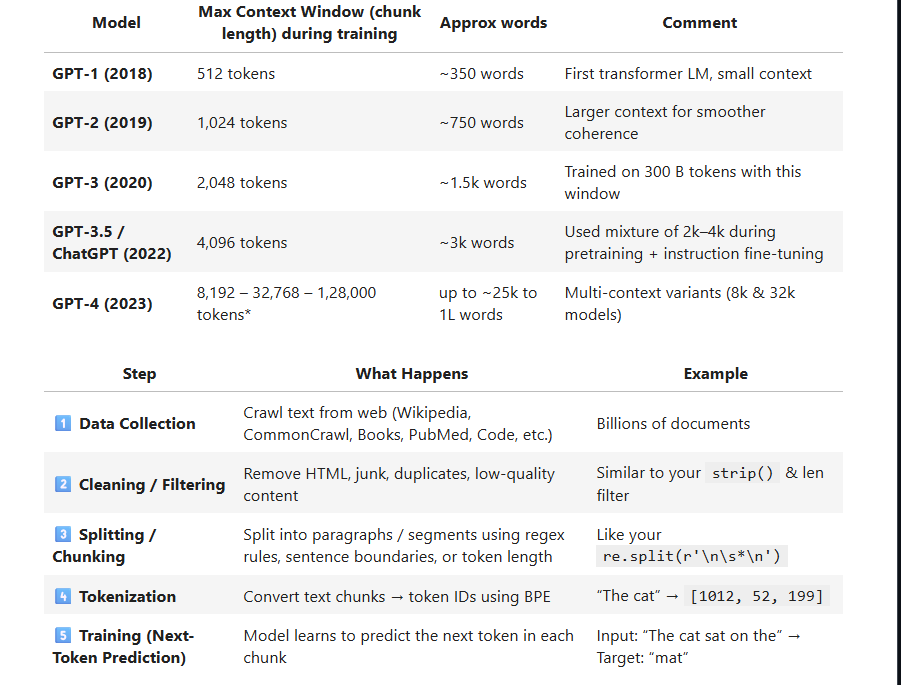

In [9]:
import fitz


In [13]:
def extract_text_from_pdf(pdf_path):
    text_blocks = []
    with fitz.open(pdf_path) as doc:
        for page in doc:
            text = page.get_text("text").strip()
            if text:
                text_blocks.append(text)
    return text_blocks

In [14]:
pdf_texts = extract_text_from_pdf("/content/Metformin.pdf")


In [15]:
pdf_texts

['Metformin is one of the most widely prescribed oral antihyperglycemic agents.\u200b\n Its primary mechanism of action involves the activation of AMP-activated protein kinase \n(AMPK), a central metabolic regulator that promotes glucose uptake and fatty acid oxidation \nwhile inhibiting hepatic gluconeogenesis.\u200b\n Beyond its glycemic control, Metformin has been shown to improve cardiovascular outcomes \nand display anti-inflammatory properties.\u200b\n Recent studies also suggest potential anticancer effects through inhibition of the mTOR \nsignaling pathway and suppression of tumor angiogenesis. \n \nClinical trials have demonstrated that combining Atorvastatin with Ezetimibe results in \nsignificant reductions in low-density lipoprotein cholesterol (LDL-C) levels compared to \nmonotherapy.\u200b\n Ezetimibe acts by inhibiting the Niemann–Pick C1-like 1 (NPC1L1) transporter in the intestinal \nwall, reducing cholesterol absorption, while Atorvastatin inhibits hepatic HMG-CoA red

In [16]:
import re
def split_paragraphs(pages):
    paragraphs = []
    for page_text in pages:
        # Split on double line breaks or long newlines
        chunks = re.split(r'\n\s*\n', page_text)
        for chunk in chunks:
            clean = chunk.strip()
            if len(clean) > 30:  # ignore too short lines
                paragraphs.append(clean)
    return paragraphs

In [17]:
paragraphs = split_paragraphs(pdf_texts)


In [18]:
paragraphs

['Metformin is one of the most widely prescribed oral antihyperglycemic agents.\u200b\n Its primary mechanism of action involves the activation of AMP-activated protein kinase \n(AMPK), a central metabolic regulator that promotes glucose uptake and fatty acid oxidation \nwhile inhibiting hepatic gluconeogenesis.\u200b\n Beyond its glycemic control, Metformin has been shown to improve cardiovascular outcomes \nand display anti-inflammatory properties.\u200b\n Recent studies also suggest potential anticancer effects through inhibition of the mTOR \nsignaling pathway and suppression of tumor angiogenesis.',
 'Clinical trials have demonstrated that combining Atorvastatin with Ezetimibe results in \nsignificant reductions in low-density lipoprotein cholesterol (LDL-C) levels compared to \nmonotherapy.\u200b\n Ezetimibe acts by inhibiting the Niemann–Pick C1-like 1 (NPC1L1) transporter in the intestinal \nwall, reducing cholesterol absorption, while Atorvastatin inhibits hepatic HMG-CoA redu

In [19]:
data = [{"text": p} for p in paragraphs]


In [20]:
data

[{'text': 'Metformin is one of the most widely prescribed oral antihyperglycemic agents.\u200b\n Its primary mechanism of action involves the activation of AMP-activated protein kinase \n(AMPK), a central metabolic regulator that promotes glucose uptake and fatty acid oxidation \nwhile inhibiting hepatic gluconeogenesis.\u200b\n Beyond its glycemic control, Metformin has been shown to improve cardiovascular outcomes \nand display anti-inflammatory properties.\u200b\n Recent studies also suggest potential anticancer effects through inhibition of the mTOR \nsignaling pathway and suppression of tumor angiogenesis.'},
 {'text': 'Clinical trials have demonstrated that combining Atorvastatin with Ezetimibe results in \nsignificant reductions in low-density lipoprotein cholesterol (LDL-C) levels compared to \nmonotherapy.\u200b\n Ezetimibe acts by inhibiting the Niemann–Pick C1-like 1 (NPC1L1) transporter in the intestinal \nwall, reducing cholesterol absorption, while Atorvastatin inhibits h

In [21]:
dataset = Dataset.from_list(data)


In [22]:
dataset

Dataset({
    features: ['text'],
    num_rows: 4
})

In [23]:
model_name = "TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T"

# model_name = "meta-llama/Llama-2-7b-hf"
# model_name = "meta-llama/Llama-3.1-8B"

In [24]:
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, DataCollatorForLanguageModeling


In [25]:
tokenizer = AutoTokenizer.from_pretrained(model_name)


tokenizer_config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [26]:
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

In [27]:
def tokenize_fn(examples):
    tokens = tokenizer(examples["text"],truncation=True,padding="max_length",max_length=512)
    tokens["labels"] = tokens["input_ids"].copy()
    return tokens


In [28]:
tokenized = dataset.map(tokenize_fn, batched=True, remove_columns=["text"])


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

In [29]:
tokenized

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 4
})

In [30]:
# tokenized.features['attention_mask']

In [31]:
model = AutoModelForCausalLM.from_pretrained(model_name)


config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.40G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/129 [00:00<?, ?B/s]

In [32]:
training_args = TrainingArguments(
    output_dir="./llama-pharma-domain",
    overwrite_output_dir=True,
    num_train_epochs=2,
    per_device_train_batch_size=2,
    save_steps=500,
    save_total_limit=2,
    logging_steps=50,
    learning_rate=2e-5,
    fp16=True,
    report_to="none"
)

In [33]:
from transformers import TrainingArguments
help(TrainingArguments)

Help on class TrainingArguments in module transformers.training_args:

class TrainingArguments(builtins.object)
 |  TrainingArguments(output_dir: Optional[str] = None, overwrite_output_dir: bool = False, do_train: bool = False, do_eval: bool = False, do_predict: bool = False, eval_strategy: Union[transformers.trainer_utils.IntervalStrategy, str] = 'no', prediction_loss_only: bool = False, per_device_train_batch_size: int = 8, per_device_eval_batch_size: int = 8, per_gpu_train_batch_size: Optional[int] = None, per_gpu_eval_batch_size: Optional[int] = None, gradient_accumulation_steps: int = 1, eval_accumulation_steps: Optional[int] = None, eval_delay: float = 0, torch_empty_cache_steps: Optional[int] = None, learning_rate: float = 5e-05, weight_decay: float = 0.0, adam_beta1: float = 0.9, adam_beta2: float = 0.999, adam_epsilon: float = 1e-08, max_grad_norm: float = 1.0, num_train_epochs: float = 3.0, max_steps: int = -1, lr_scheduler_type: Union[transformers.trainer_utils.SchedulerType

In [34]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized
)

In [35]:
# trainer.train()


In [36]:

import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [37]:
!pip install -U peft bitsandbytes transformers accelerate


In [38]:

from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments, Trainer
from peft import LoraConfig, get_peft_model, TaskType
from datasets import load_dataset

In [39]:
model = "TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T"


In [40]:
tokenizer = AutoTokenizer.from_pretrained(model)


In [41]:
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

In [42]:
def tokenize_fn(examples):
    tokens = tokenizer(
        examples["text"],
        truncation=True,
        padding="max_length",
        max_length=512
    )
    tokens["labels"] = tokens["input_ids"].copy()
    return tokens

In [43]:
tokenized = dataset.map(tokenize_fn, batched=True)


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

In [44]:
tokenized

Dataset({
    features: ['text', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 4
})

In [45]:


model = AutoModelForCausalLM.from_pretrained(
    model,
    load_in_8bit=True,
    device_map="auto"
)

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


In [46]:

lora_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    r=8,
    lora_alpha=16,
    target_modules=["q_proj","v_proj"],
    lora_dropout=0.05,
    bias="none"
)

In [47]:
non_inst_model_lora = get_peft_model(model, lora_config)


In [48]:

args = TrainingArguments(
    output_dir="./tinyllama-lora",
    num_train_epochs=5,
    per_device_train_batch_size=1,
    gradient_accumulation_steps=8,
    learning_rate=2e-4,
    fp16=True,
    logging_steps=20,
    save_total_limit=1,
    report_to="none"
)

In [49]:

trainer = Trainer(
    model=non_inst_model_lora,
    args=args,
    train_dataset=tokenized
)


In [50]:
trainer.train()


Step,Training Loss


TrainOutput(global_step=5, training_loss=9.6629150390625, metrics={'train_runtime': 12.9575, 'train_samples_per_second': 1.544, 'train_steps_per_second': 0.386, 'total_flos': 63629646888960.0, 'train_loss': 9.6629150390625, 'epoch': 5.0})

In [51]:
model_path="/content/tinyllama-lora/checkpoint-5"

In [52]:
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")


In [53]:
prompt = "Clinical trials demonstrated that combining Atorvastatin with Ezetimibe"


In [54]:
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")


In [55]:


outputs = model.generate(
    **inputs,
    max_new_tokens=100,
    temperature=0.8,
    top_p=0.9,
    do_sample=True,
    repetition_penalty=1.1
)


In [56]:

print("\nModel Output:\n")
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Model Output:

Clinical trials demonstrated that combining Atorvastatin with Ezetimibe was more effective than Atorvastatin and placebo in reducing LDL-C. In addition, the data suggest that Ezetimibe is associated with less adverse events than Atorvastatin.
Pravastatinum is a combination of pravastatin (10 mg) with simvastatin (20 mg). Both statins have been used as first line therapy for cholesterol lowering in patients with hypercholest
